## Music and FFT

In [1]:
# load a piece of mp3 music
# convert it to wav
# play it

import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.playback import play
from scipy import signal
import audiosegment

# load mp3 file
audio = AudioSegment.from_file("test.mp3", format="mp3")

# convert to wav
audio = audio.set_frame_rate(44100).set_channels(1)


In [2]:

# play audio
play(audio)



Input #0, wav, from '/var/folders/3y/v1v3hl9s3sscn7g8tyctzfwm0000gn/T/tmp7cx9atn5.wav':
  Duration: 00:00:08.91, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


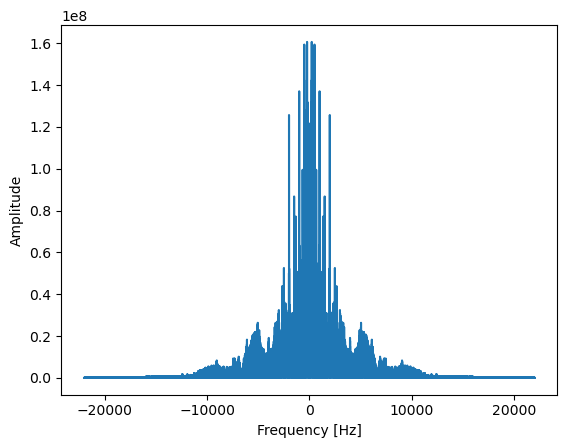

In [5]:
import numpy as np

# get audio data as numpy array
samples = audio.get_array_of_samples()
samples = np.array(samples)

fft = np.fft.fft(samples)
freqs = np.fft.fftfreq(samples.size, 1/44100)


# plot spectrum
plt.plot(freqs, np.abs(fft))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

## Downsample

In [87]:
downsampled_samples = samples[0:-1:8]

# create new audio segment with downsampled signal
downsampled_samples_audio = AudioSegment(
    data=downsampled_samples.astype(np.int16).tobytes(),
    sample_width=int(samples.dtype.itemsize),
    frame_rate=int(44100/8),
    channels=1
)

# play downsampled audio
play(downsampled_samples_audio)

Input #0, wav, from '/var/folders/3y/v1v3hl9s3sscn7g8tyctzfwm0000gn/T/tmp9ihbskki.wav':
  Duration: 00:00:08.91, bitrate: 88 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 5512 Hz, 1 channels, s16, 88 kb/s


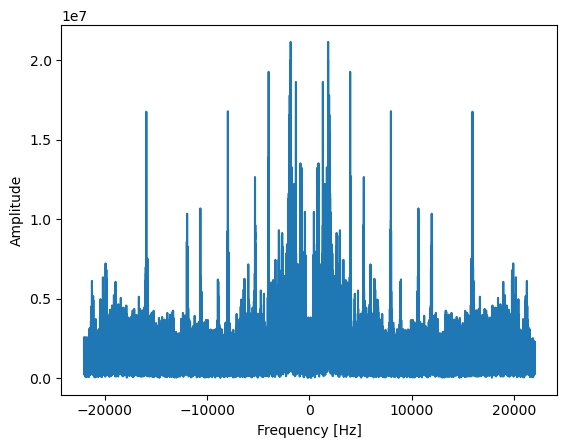

In [88]:
fft = np.fft.fft(downsampled_samples)
freqs = np.fft.fftfreq(downsampled_samples.size, 1/44100)


# plot spectrum
plt.plot(freqs, np.abs(fft))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# create new audio segment with upsampled signal
downsampled_audio = AudioSegment(
    data=samples.tobytes(),
    sample_width=samples.dtype.itemsize,
    frame_rate=44100*2,
    channels=1
)

print(samples.dtype.itemsize)

# play upsampled audio
play(downsampled_audio)

In [ ]:
# get audio data as numpy array
downsampled_audio = downsampled_audio.get_array_of_samples()
downsampled_audio = np.array(downsampled_audio)

fft = np.fft.fft(downsampled_audio)
freqs = np.fft.fftfreq(downsampled_audio.size, 1/44100)

# plot spectrum
plt.plot(freqs, np.abs(fft))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

## Upsample

sequentially insert zero:

![image](test.png)

In [93]:
# from scipy.signal import resample
# upsampled_audio = resample(samples, int(len(samples) * 2))

# import librosa
# convert ndarray of int to float
# samples1 = samples.astype(np.float32)
# y_8k = librosa.resample(samples1, orig_sr=44100, target_sr=44100*2)

import numpy as np
upsampled_audio = np.zeros(len(samples)*2)
upsampled_audio[0:-1:2] = samples
# upsampled_audio[1::2] = samples

# upsampled_audio = samples

# create new audio segment with downsampled signal
upsampled_samples_audio = AudioSegment(
    data=upsampled_audio.astype(np.int16).tobytes(),
    sample_width=2,
    frame_rate=int(44100),
    channels=1
)

# play downsampled audio
play(upsampled_samples_audio)

Input #0, wav, from '/var/folders/3y/v1v3hl9s3sscn7g8tyctzfwm0000gn/T/tmp4lt2tqen.wav':
  Duration: 00:00:17.82, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


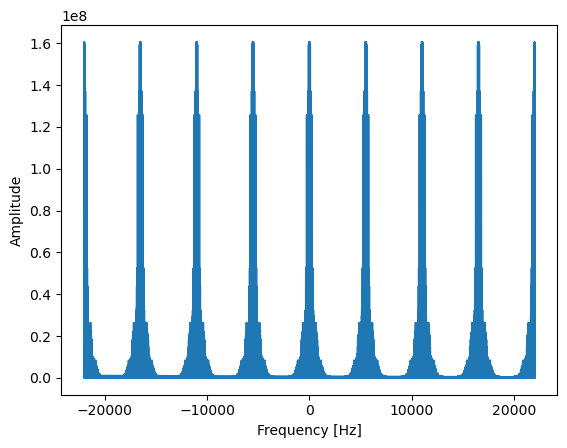

In [64]:
fft_us = np.fft.fft(upsampled_audio.astype(np.int16))
freqs = np.fft.fftfreq(upsampled_audio.size, 1/44100)

samples2 = upsampled_samples_audio.get_array_of_samples()
samples2 = np.array(samples2)
fft_us = np.fft.fft(samples2.astype(np.int16))
freqs = np.fft.fftfreq(upsampled_audio.size, 1/44100)

# plot spectrum
plt.plot(freqs, np.abs(fft_us))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()


## 超过 48000 的部分没有什么太大的意义
![audio](audio.png)